In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

In [2]:
#Load in the Zillow Home Value Index dataframe

url ="https://docs.google.com/spreadsheets/d/e/2PACX-1vQN3Ksa9szQuO4G1-msXWAp17KtVHQCBnuEieu_auu1wSiBf3-krHusIx5VBMkihxj-KZLBosDIGEyR/pub?output=csv"
zillow_data = pd.read_csv(url)
zillow_data

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,2000-01-31,2000-02-29,...,2021-12-31,2022-01-31,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30
0,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,253690.0,255517.0,...,741586.0,745686.0,750578.0,756734.0,762321.0,768797.0,773944.0,777692.0,779960.0,781622.0
1,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,234181.0,234401.0,...,924019.0,928991.0,937936.0,953874.0,973168.0,990391.0,992337.0,992630.0,978196.0,966595.0
2,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,109068.0,109079.0,...,245783.0,248718.0,252080.0,256435.0,261101.0,265558.0,268901.0,271059.0,272400.0,272639.0
3,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,166139.0,166536.0,...,302821.0,305104.0,306404.0,308303.0,309649.0,312487.0,314663.0,315910.0,315587.0,315429.0
4,6915,4,San Antonio,city,TX,TX,"San Antonio-New Braunfels, TX",Bexar County,114794.0,114975.0,...,269323.0,274032.0,278464.0,284127.0,289739.0,294776.0,297727.0,298796.0,299124.0,298951.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22462,236350,28439,Palisades,city,TX,TX,"Amarillo, TX",Randall County,NaN,NaN,...,198490.0,198467.0,196420.0,192002.0,191634.0,189383.0,191134.0,191343.0,192384.0,192110.0
22463,40403,28439,Port Mansfield,city,TX,TX,"Raymondville, TX",Willacy County,NaN,NaN,...,229251.0,232984.0,238245.0,240154.0,242470.0,243119.0,249098.0,255572.0,261910.0,264685.0
22464,54740,28439,Tribes Hill,city,NY,NY,"Amsterdam, NY",Montgomery County,53380.0,53662.0,...,132490.0,134951.0,137470.0,137430.0,137413.0,137615.0,138908.0,140096.0,141573.0,142438.0
22465,249186,28439,Derby Center,city,VT,VT,NaN,Orleans County,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,258191.0,261607.0,264571.0,266255.0


In [3]:
# Filter the 4 largest cities
largest_cities = zillow_data[zillow_data['SizeRank'].isin([0, 1, 2, 3])]
largest_cities

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,2000-01-31,2000-02-29,...,2021-12-31,2022-01-31,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30
0,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,253690.0,255517.0,...,741586.0,745686.0,750578.0,756734.0,762321.0,768797.0,773944.0,777692.0,779960.0,781622.0
1,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,234181.0,234401.0,...,924019.0,928991.0,937936.0,953874.0,973168.0,990391.0,992337.0,992630.0,978196.0,966595.0
2,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,109068.0,109079.0,...,245783.0,248718.0,252080.0,256435.0,261101.0,265558.0,268901.0,271059.0,272400.0,272639.0
3,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,166139.0,166536.0,...,302821.0,305104.0,306404.0,308303.0,309649.0,312487.0,314663.0,315910.0,315587.0,315429.0


In [4]:
# Melt the data to long-form
melted_data = pd.melt(largest_cities, id_vars=['RegionID','RegionType' ,'StateName' ,'RegionName', 'State', 'Metro', 'CountyName', 'SizeRank'],
                      var_name='Date', value_name='HomeValue')
melted_data

,RegionID,RegionType,StateName,RegionName,State,Metro,CountyName,SizeRank,Date,HomeValue
0,6181,city,NY,New York,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,0,2000-01-31,253690.0
1,12447,city,CA,Los Angeles,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,1,2000-01-31,234181.0
2,39051,city,TX,Houston,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,2,2000-01-31,109068.0
3,17426,city,IL,Chicago,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,3,2000-01-31,166139.0
4,6181,city,NY,New York,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,0,2000-02-29,255517.0
...,...,...,...,...,...,...,...,...,...,...
1087,17426,city,IL,Chicago,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,3,2022-08-31,315587.0
1088,6181,city,NY,New York,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,0,2022-09-30,781622.0
1089,12447,city,CA,Los Angeles,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,1,2022-09-30,966595.0
1090,39051,city,TX,Houston,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,2,2022-09-30,272639.0


In [5]:
melted_data.columns

Index(['RegionID', 'RegionType', 'StateName', 'RegionName', 'State', 'Metro',
       'CountyName', 'SizeRank', 'Date', 'HomeValue'],
      dtype='object')

In [6]:
# Convert the melted dates into datetime datatype
melted_data['Date'] = pd.to_datetime(melted_data['Date'], format='%Y-%m-%d')
melted_data['Date']

0      2000-01-31
1      2000-01-31
2      2000-01-31
3      2000-01-31
4      2000-02-29
          ...    
1087   2022-08-31
1088   2022-09-30
1089   2022-09-30
1090   2022-09-30
1091   2022-09-30
Name: Date, Length: 1092, dtype: datetime64[ns]

In [7]:
# Make the datetime column the index
melted_data.set_index('Date', inplace=True)
melted_data

,RegionID,RegionType,StateName,RegionName,State,Metro,CountyName,SizeRank,HomeValue
Date,,,,,,,,,
2000-01-31,6181,city,NY,New York,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,0,253690.0
2000-01-31,12447,city,CA,Los Angeles,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,1,234181.0
2000-01-31,39051,city,TX,Houston,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,2,109068.0
2000-01-31,17426,city,IL,Chicago,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,3,166139.0
2000-02-29,6181,city,NY,New York,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,0,255517.0
...,...,...,...,...,...,...,...,...,...
2022-08-31,17426,city,IL,Chicago,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,3,315587.0
2022-09-30,6181,city,NY,New York,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,0,781622.0
2022-09-30,12447,city,CA,Los Angeles,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,1,966595.0


In [8]:
# Resample the dataframe as monthly frequency, grouped by City
resampled_data = melted_data.groupby('RegionName')['HomeValue'].resample('M').mean()
resampled_data

RegionName  Date      
Chicago     2000-01-31    166139.0
            2000-02-29    166536.0
            2000-03-31    167368.0
            2000-04-30    168826.0
            2000-05-31    170499.0
                            ...   
New York    2022-05-31    768797.0
            2022-06-30    773944.0
            2022-07-31    777692.0
            2022-08-31    779960.0
            2022-09-30    781622.0
Name: HomeValue, Length: 1092, dtype: float64

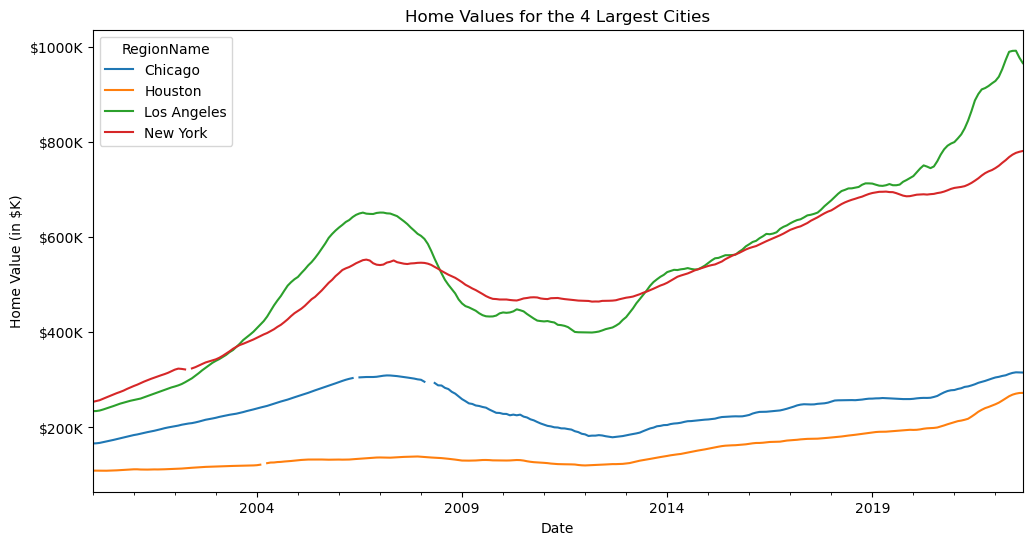

In [9]:
# Plot the home values for all 4 cities
fig, ax = plt.subplots(figsize=(12, 6))
resampled_data.unstack('RegionName').plot(ax=ax)
plt.title('Home Values for the 4 Largest Cities')
plt.xlabel('Date')
plt.ylabel('Home Value (in $K)')

# Reformat the y-axis ticks to use thousands of dollars with a "K" at the end
formatter = FuncFormatter(lambda x, _: f"${int(x/1000)}K")
ax.yaxis.set_major_formatter(formatter)

# Show the plot
plt.show()

## # Answering the questions using pandas

In [10]:
# 1) Which City had the highest Typical Home Value at the end of 2008? Which had the least?
end_of_2008_values = melted_data.loc['2008-12-31'].groupby('RegionName')['HomeValue'].mean()
end_of_2008_values

RegionName
Chicago        265306.0
Houston        131283.0
Los Angeles    469294.0
New York       510309.0
Name: HomeValue, dtype: float64

In [11]:
# 1) Which City had the highest Typical Home Value at the end of 2008? Which had the least?
end_of_2008_values = melted_data.loc['2008-12-31'].groupby('RegionName')['HomeValue'].mean()
max_value_city = end_of_2008_values.idxmax()
min_value_city = end_of_2008_values.idxmin()
print(f"1) City with the highest typical home value at the end of 2008: {max_value_city}")
print(f"   City with the least typical home value at the end of 2008: {min_value_city}")


1) City with the highest typical home value at the end of 2008: New York
   City with the least typical home value at the end of 2008: Houston


In [12]:
print(melted_data.index.unique())

DatetimeIndex(['2000-01-31', '2000-02-29', '2000-03-31', '2000-04-30',
               '2000-05-31', '2000-06-30', '2000-07-31', '2000-08-31',
               '2000-09-30', '2000-10-31',
               ...
               '2021-12-31', '2022-01-31', '2022-02-28', '2022-03-31',
               '2022-04-30', '2022-05-31', '2022-06-30', '2022-07-31',
               '2022-08-31', '2022-09-30'],
              dtype='datetime64[ns]', name='Date', length=273, freq=None)


In [14]:
# Select the data for November 2008
nov_2008_data = melted_data.loc['2008-11-01':'2008-11-30'].groupby('RegionName')['HomeValue'].mean()
nov_2008_data

RegionName
Chicago        271059.0
Houston        132247.0
Los Angeles    481905.0
New York       514767.0
Name: HomeValue, dtype: float64

In [15]:
# Select the data for December 2008
dec_2008_data = melted_data.loc['2008-12-01':'2008-12-31'].groupby('RegionName')['HomeValue'].mean()
dec_2008_data

RegionName
Chicago        265306.0
Houston        131283.0
Los Angeles    469294.0
New York       510309.0
Name: HomeValue, dtype: float64

In [16]:

# Merge the two dataframes on City and Date
merged_data = pd.merge(nov_2008_data, dec_2008_data, on=['RegionName'], suffixes=('_nov', '_dec'))
merged_data

,HomeValue_nov,HomeValue_dec
RegionName,,
Chicago,271059.0,265306.0
Houston,132247.0,131283.0
Los Angeles,481905.0,469294.0
New York,514767.0,510309.0


In [17]:

merged_data['HomeValue_change'] = merged_data[['HomeValue_dec', 'HomeValue_nov']].diff(axis=1)['HomeValue_nov']

merged_data



,HomeValue_nov,HomeValue_dec,HomeValue_change
RegionName,,,
Chicago,271059.0,265306.0,5753.0
Houston,132247.0,131283.0,964.0
Los Angeles,481905.0,469294.0,12611.0
New York,514767.0,510309.0,4458.0


In [18]:
# Display the result with city names
print("2) Home values change from November 2008 to December 2008:")
print(merged_data.reset_index()[['RegionName',  'HomeValue_nov',  'HomeValue_dec', 'HomeValue_change']])

2) Home values change from November 2008 to December 2008:
    RegionName  HomeValue_nov  HomeValue_dec  HomeValue_change
0      Chicago       271059.0       265306.0            5753.0
1      Houston       132247.0       131283.0             964.0
2  Los Angeles       481905.0       469294.0           12611.0
3     New York       514767.0       510309.0            4458.0
